In [1]:
#Bütikofer Kevin, Charles-Lewis Jaggi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

xl_file = pd.ExcelFile("lausanne-appart.xlsx")

data =  np.array(xl_file.parse("Lausanne-appart")) # sheet name
x = data[:,0]
y = data[:,2]

In [2]:
n = len(x)
x_bias = np.ones((n,1))
x_matrice = np.reshape(x,(n,1))
X = np.append(x_matrice,x_bias,axis=1)

Xt = np.transpose(X)
XtX = np.dot(Xt,X)
Xty = np.dot(Xt,y)

theta = np.linalg.solve(XtX,Xty)

# for confirm calcul
x_test = np.reshape(x,n)
theta_conf = np.polyfit(x_test,y,1)

print(theta, "theta calcul")
print(theta_conf, "theta polyfit")

[ 26.33242457 240.07710727] theta calcul
[ 26.33242457 240.07710727] theta polyfit


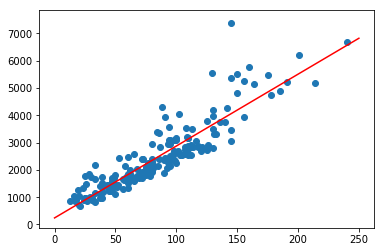

In [3]:
new_x = np.linspace(0, 250, 250)
new_y = new_x * theta[0] + theta[1]
plt.plot(new_x, new_y, color="red")
plt.scatter(x,y)

In [4]:
h = np.poly1d(theta)
sub = h(x)-y
print("Overall cost value: ", np.sum(np.square(sub))/(2*n))

Overall cost value:  138034.95779787414
